# Image text recognition 

## 5. Data Preparation

In [19]:
import numpy as np
import pandas as pd
from PIL import Image as pilImg
import os 
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import itertools

**Preparing Train Data**

Considering images with labels of length>=4 and length <=12 for this Case Study

In [20]:
def Extract_image_names(file_path,number):
    """
    Takes the file path of images annotation txt file with the number of images names to be extracted
    and returns the list of file names having label length <=12
    """
    with open(file_path) as f:
        file_names=f.readlines()
        f.close()
        count=0
        img_names=[]
        for file in file_names:
            _,label,_=file.split('_')
            if len(label)>=4 and len(label)<=12:
                img_names.append(file)
                count+=1
            if count==number:
                break
        images_names=['mnt/ramdisk/max/90kDICT32px'+x.strip() for x in img_names]
        return images_names

In [21]:
train_images= Extract_image_names('mnt/ramdisk/max/90kDICT32px/annotation_train.txt',100000)

In [22]:
train_images[:5]

['mnt/ramdisk/max/90kDICT32px./2425/1/115_Lube_45484.jpg 45484',
 'mnt/ramdisk/max/90kDICT32px./2425/1/114_Spencerian_73323.jpg 73323',
 'mnt/ramdisk/max/90kDICT32px./2425/1/112_CARPENTER_11682.jpg 11682',
 'mnt/ramdisk/max/90kDICT32px./2425/1/110_savannas_67969.jpg 67969',
 'mnt/ramdisk/max/90kDICT32px./2425/1/109_unfix_82473.jpg 82473']

In [23]:
def clean_file_names(file_names):
    clean_files=[]
    for file in file_names:
        main_folder,img_loc,extension=file.split('.')
        #Removing the image number at the end
        extension,_=extension.split(' ')
        img_file=main_folder+img_loc+'.'+extension
        clean_files.append(img_file)
    return clean_files

In [24]:
train_cleaned=clean_file_names(train_images)

In [25]:
train_cleaned[:5]

['mnt/ramdisk/max/90kDICT32px/2425/1/115_Lube_45484.jpg',
 'mnt/ramdisk/max/90kDICT32px/2425/1/114_Spencerian_73323.jpg',
 'mnt/ramdisk/max/90kDICT32px/2425/1/112_CARPENTER_11682.jpg',
 'mnt/ramdisk/max/90kDICT32px/2425/1/110_savannas_67969.jpg',
 'mnt/ramdisk/max/90kDICT32px/2425/1/109_unfix_82473.jpg']

In [26]:
train_data=pd.DataFrame({'ImageName':train_cleaned})

In [27]:
train_data.head()

,ImageName
0,mnt/ramdisk/max/90kDICT32px/2425/1/115_Lube_45...
1,mnt/ramdisk/max/90kDICT32px/2425/1/114_Spencer...
2,mnt/ramdisk/max/90kDICT32px/2425/1/112_CARPENT...
3,mnt/ramdisk/max/90kDICT32px/2425/1/110_savanna...
4,mnt/ramdisk/max/90kDICT32px/2425/1/109_unfix_8...


**The Ground Truth Values are present in the image file names, so we need to extract it and Store it in Ground Truth Column**

In [28]:
def extract_ground_truth(files):
    """
    Given the file names of images, extracts the Ground Truth Values and returns a list of Ground Truth Labels in All Capitals
    """
    txt_labels=[]
    for file in files:
        folder,ground_truth,image=file.split('_')
        ground_truth=ground_truth.upper()
        txt_labels.append(ground_truth)
    return txt_labels        

In [29]:
Train_ground_truths=extract_ground_truth(train_cleaned)

In [30]:
train_data['Labels']=Train_ground_truths

In [31]:
train_data.head()

,ImageName,Labels
0,mnt/ramdisk/max/90kDICT32px/2425/1/115_Lube_45...,LUBE
1,mnt/ramdisk/max/90kDICT32px/2425/1/114_Spencer...,SPENCERIAN
2,mnt/ramdisk/max/90kDICT32px/2425/1/112_CARPENT...,CARPENTER
3,mnt/ramdisk/max/90kDICT32px/2425/1/110_savanna...,SAVANNAS
4,mnt/ramdisk/max/90kDICT32px/2425/1/109_unfix_8...,UNFIX


In [32]:
train_data.to_csv('Train_data.csv')

**Preparing Validation Data**

In [33]:
Validation_images=Extract_image_names('mnt/ramdisk/max/90kDICT32px/annotation_val.txt',12000)

In [34]:
val_cleaned=clean_file_names(Validation_images)

In [35]:
val_data=pd.DataFrame({'ImageName':val_cleaned})

In [36]:
val_data.head()

,ImageName
0,mnt/ramdisk/max/90kDICT32px/2697/6/466_MONIKER...
1,mnt/ramdisk/max/90kDICT32px/2697/6/464_FIRESTO...
2,mnt/ramdisk/max/90kDICT32px/2697/6/462_Repurch...
3,mnt/ramdisk/max/90kDICT32px/2697/6/461_PIGTAIL...
4,mnt/ramdisk/max/90kDICT32px/2697/6/460_landlad...


In [37]:
Val_ground_truths=extract_ground_truth(val_cleaned)

In [38]:
val_data['Labels']=Val_ground_truths

In [39]:
val_data.head()

,ImageName,Labels
0,mnt/ramdisk/max/90kDICT32px/2697/6/466_MONIKER...,MONIKER
1,mnt/ramdisk/max/90kDICT32px/2697/6/464_FIRESTO...,FIRESTORM
2,mnt/ramdisk/max/90kDICT32px/2697/6/462_Repurch...,REPURCHASES
3,mnt/ramdisk/max/90kDICT32px/2697/6/461_PIGTAIL...,PIGTAIL
4,mnt/ramdisk/max/90kDICT32px/2697/6/460_landlad...,LANDLADIES


In [40]:
val_data.to_csv('Validation_data.csv')

**Preparing Test Data** 

In [41]:
test_images=Extract_image_names('mnt/ramdisk/max/90kDICT32px/annotation_test.txt',15000)

In [42]:
test_cleaned=clean_file_names(test_images)

In [43]:
test_data=pd.DataFrame({'ImageName':test_cleaned})

In [44]:
test_data.head()

,ImageName
0,mnt/ramdisk/max/90kDICT32px/3000/7/182_slinkin...
1,mnt/ramdisk/max/90kDICT32px/3000/7/181_REMODEL...
2,mnt/ramdisk/max/90kDICT32px/3000/7/180_Chronog...
3,mnt/ramdisk/max/90kDICT32px/3000/7/179_Impeach...
4,mnt/ramdisk/max/90kDICT32px/3000/7/177_Loots_4...


In [45]:
test_ground_truths=extract_ground_truth(test_cleaned)

In [46]:
test_data['Labels']=test_ground_truths

In [47]:
test_data.head()

,ImageName,Labels
0,mnt/ramdisk/max/90kDICT32px/3000/7/182_slinkin...,SLINKING
1,mnt/ramdisk/max/90kDICT32px/3000/7/181_REMODEL...,REMODELERS
2,mnt/ramdisk/max/90kDICT32px/3000/7/180_Chronog...,CHRONOGRAPHS
3,mnt/ramdisk/max/90kDICT32px/3000/7/179_Impeach...,IMPEACHING
4,mnt/ramdisk/max/90kDICT32px/3000/7/177_Loots_4...,LOOTS


In [48]:
test_data.to_csv('Test_data.csv')

## 6. Image Processing -Converting to Single Channel

We need to Extract The images present in multiple folder paths in the original Big Data set and store them in a specified Train and Validation Data folder by taking the single channel gray scale images

In [49]:
def img_store_single_channel(destination_folder,files):
    """
    Takes the images in a folder, distination folder path and 
    converts the image to single channel gray scale,
    stores the image in the destination folder and returns image destination list
    """
    start=datetime.now()
    destination_list=[]
    count=1
    for file in files:
        #Removing the extra folder structures
        _,_,_,_,_,_,Name=file.split('/')
        _,img,_=Name.split('_')
        destination=destination_folder+str(count)+'_'+img+'.jpg'
        cv_img=cv2.imread(file)
        #So extracting image from any 1 channel gives a single channel Grayscale image
        cv_img_sc=cv_img[:,:,1]
        cv2.imwrite(destination,cv_img_sc)
        destination_list.append(destination)
        count+=1

    print('Time Taken for Processing: ',datetime.now() - start)
    return destination_list

**Processing Train Data**

In [50]:
train_data=pd.read_csv('Train_data.csv')

In [51]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [52]:
train_files=train_data['ImageName'].values

In [53]:
train_dest=img_store_single_channel('Train_data/',train_files)

Time Taken for Processing:  0:08:21.303102


In [54]:
#Updating Train Dataframe with new destination file paths
train_data['ImageName']=train_dest

In [55]:
train_data.head()

,ImageName,Labels
0,Train_data/1_Lube.jpg,LUBE
1,Train_data/2_Spencerian.jpg,SPENCERIAN
2,Train_data/3_CARPENTER.jpg,CARPENTER
3,Train_data/4_savannas.jpg,SAVANNAS
4,Train_data/5_unfix.jpg,UNFIX


In [56]:
train_data.to_csv('Train_Final.csv')

**Processing Validation Data**

In [57]:
val_data=pd.read_csv('Validation_data.csv')

In [58]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [59]:
val_files=val_data['ImageName'].values

In [60]:
val_dest=img_store_single_channel('Val_data/',val_files)

Time Taken for Processing:  0:00:47.942159


In [61]:
#Updating Validation Dataframe with new destination file paths
val_data['ImageName']=val_dest

In [62]:
val_data.head()

,ImageName,Labels
0,Val_data/1_MONIKER.jpg,MONIKER
1,Val_data/2_FIRESTORM.jpg,FIRESTORM
2,Val_data/3_Repurchases.jpg,REPURCHASES
3,Val_data/4_PIGTAIL.jpg,PIGTAIL
4,Val_data/5_landladies.jpg,LANDLADIES


In [63]:
#Saving the updated Validation Dataframe
val_data.to_csv('Validation_Final.csv')

**Processing Test Data**

In [64]:
test_data=pd.read_csv('Test_data.csv')

In [65]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [66]:
test_files=test_data['ImageName'].values

In [67]:
test_dest=img_store_single_channel('Test_data/',test_files)

Time Taken for Processing:  0:01:54.144477


In [68]:
#Updating Test Dataframe with new destination file paths
test_data['ImageName']=test_dest

In [69]:
test_data.head()

,ImageName,Labels
0,Test_data/1_slinking.jpg,SLINKING
1,Test_data/2_REMODELERS.jpg,REMODELERS
2,Test_data/3_Chronographs.jpg,CHRONOGRAPHS
3,Test_data/4_Impeaching.jpg,IMPEACHING
4,Test_data/5_Loots.jpg,LOOTS


In [70]:
#Saving the updated Test Dataframe
test_data.to_csv('Test_Final.csv')

## 7.1. Image Size Analysis

In [71]:
train_data=pd.read_csv('Train_data.csv')
val_data=pd.read_csv('Validation_Data.csv')
test_data=pd.read_csv('Test_Data.csv')

In [72]:
def Write_Image_Sizes(filenames,storage_file):
    """
    Takes the File names, writes the width and height of images in csv along with file names
    """
    store_file=open(storage_file,'w+')
    store_file.write("ImageName,Height,Width")
    store_file.write("\n")
    cnt=0
    for file in filenames:
        cv_img=cv2.imread(file)
        #img.shape gives (img_height,img_width,img_channel)
        store_file.write(str(file)+","+str(cv_img.shape[0])+","+str(cv_img.shape[1]))
        store_file.write("\n")
        cnt+=1
        if cnt%10000==0:
            print("Processed Images: ",cnt)
    store_file.close()       

In [73]:
train_image_names=list(train_data['ImageName'].values)
val_image_names=list(val_data['ImageName'].values)
test_image_names=list(test_data['ImageName'].values)

In [74]:
Write_Image_Sizes(train_image_names,'Train_image_sizes.csv')

Processed Images:  10000
Processed Images:  20000
Processed Images:  30000
Processed Images:  40000
Processed Images:  50000
Processed Images:  60000
Processed Images:  70000
Processed Images:  80000
Processed Images:  90000
Processed Images:  100000


In [75]:
Write_Image_Sizes(val_image_names,'Validation_image_sizes.csv')

Processed Images:  10000


In [76]:
Write_Image_Sizes(test_image_names,'Test_image_sizes.csv')

Processed Images:  10000


In [77]:
train_img_size=pd.read_csv('Train_image_sizes.csv')
val_img_size=pd.read_csv('Validation_image_sizes.csv')
test_img_size=pd.read_csv('Test_image_sizes.csv')

In [78]:
train_img_size.describe()

,Height,Width
count,100000.000000,100000.000000
mean,31.036070,115.635930
std,0.359514,39.727547
min,9.000000,1.000000
25%,31.000000,88.000000
50%,31.000000,109.000000
75%,31.000000,136.000000
max,32.000000,608.000000


In [79]:
val_img_size.describe()

,Height,Width
count,12000.000000,12000.000000
mean,31.037083,115.644167
std,0.326421,39.476965
min,16.000000,25.000000
25%,31.000000,88.000000
50%,31.000000,110.000000
75%,31.000000,136.000000
max,32.000000,440.000000


In [80]:
test_img_size.describe()

,Height,Width
count,15000.000000,15000.000000
mean,31.040600,115.166000
std,0.353497,39.400603
min,6.000000,1.000000
25%,31.000000,87.000000
50%,31.000000,109.000000
75%,31.000000,136.000000
max,32.000000,464.000000


**Observations**

1. Images in Train Data have a mean height of 31 and mean width of ~116
2. Almost 75% of Images have width 136 and height 31

In [81]:

import re
def hasDigits(inputText):
    """
    Returns True if the given input text has digits in it otherwise returns False
    """
    return bool(re.search(r'\d', inputText))

In [82]:
def digit_count(labels,size):
    """
    Takes the list of labels and counts the number of labels with and without digits
    and prints its percentage
    """
    present=0
    absent=0
    for i in labels:
        pres=hasDigits(i)
        if pres==True:
            present+=1
        else:
            absent+=1
    present_percent=(present/size)*100
    absent_percent=(absent/size)*100
    print('Labels with Digits: ',present_percent,' %')
    print('Labels without Digits: ',absent_percent,' %')        

#### 7.2.1. Train Data

In [83]:
train_data=pd.read_csv('Train_data.csv')

In [84]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [85]:
train_label_len=[len(str(x)) for x in train_data['Labels'].values]

In [86]:
#Saving the updated Train Dataframe
train_data.to_csv('Train_Final.csv')

In [87]:
from collections import Counter

In [88]:
train_label_len_dict=Counter(train_label_len)

In [89]:
#Printing Value counts of Label Lengths 
train_label_len_dict

Counter({4: 4612,
         10: 11943,
         9: 15156,
         8: 17246,
         5: 8326,
         6: 12809,
         12: 4963,
         7: 16908,
         11: 8036,
         3: 1})

In [90]:
train_keys = [k for k in sorted(train_label_len_dict, key=train_label_len_dict.get, reverse=True)]

In [91]:
#Taking Top 5 keys with highest values 
train_top_keys=train_keys[:5]
train_top_values=[train_label_len_dict.get(k) for k in train_top_keys]

In [92]:
train_labels=[str(x) for x in train_data['Labels'].values]
digit_count(train_labels,len(train_labels))

Labels with Digits:  0.078  %
Labels without Digits:  99.922  %


#### 7.2.2. Validation Data

In [93]:
val_data=pd.read_csv('Validation_data.csv')

In [94]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [95]:
val_label_len=[len(str(x)) for x in val_data['Labels'].values]

In [96]:
val_label_len_dict=Counter(val_label_len)

In [97]:
#Printing Value counts of Label Lengths 
val_label_len_dict

Counter({7: 2078,
         9: 1817,
         11: 942,
         10: 1525,
         8: 1944,
         5: 1002,
         12: 619,
         6: 1584,
         4: 489})

In [98]:
val_keys = [k for k in sorted(val_label_len_dict, key=val_label_len_dict.get, reverse=True)]

In [99]:
#Taking Top 5 keys with highest values 
val_top_keys=val_keys[:5]
val_top_values=[val_label_len_dict.get(k) for k in val_top_keys]

**Validation Data Digit Presence Percentage**

In [100]:
val_labels=[str(x) for x in val_data['Labels'].values]
digit_count(val_labels,len(val_labels))

Labels with Digits:  0.09166666666666666  %
Labels without Digits:  99.90833333333333  %


#### 7.2.3. Test Data

In [101]:
test_data=pd.read_csv('Test_data.csv')

In [102]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [103]:
test_label_len=[len(str(x)) for x in test_data['Labels'].values]

In [104]:
test_label_len_dict=Counter(test_label_len)

In [105]:
#Printing Value counts of Label Lengths 
test_label_len_dict

Counter({8: 2490,
         10: 1742,
         12: 730,
         5: 1317,
         9: 2271,
         11: 1255,
         7: 2495,
         6: 1990,
         4: 710})

In [106]:
test_keys = [k for k in sorted(test_label_len_dict, key=test_label_len_dict.get, reverse=True)]

In [107]:
#Taking Top 5 keys with highest values 
test_top_keys=test_keys[:5]
test_top_values=[test_label_len_dict.get(k) for k in test_top_keys]

**Test Data Digit Presence Percentage**

In [108]:
test_labels=[str(x) for x in test_data['Labels'].values]
digit_count(test_labels,len(test_labels))

Labels with Digits:  0.08666666666666667  %
Labels without Digits:  99.91333333333333  %


**Label Letters Data Analysis**

In [109]:
train_data=pd.read_csv('Train_Final.csv')
val_data=pd.read_csv('Validation_Final.csv')
test_data=pd.read_csv('Test_Final.csv')

In [110]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
train_labels_combined=' '.join([str(x) for x in train_data['Labels'].values])
val_labels_combined=' '.join([str(x) for x in val_data['Labels'].values])
test_labels_combined=' '.join([str(x) for x in test_data['Labels'].values])

In [111]:
def letters_list(letter,combined_labels):
    """
    Takes the letters, combined labels text checks for the presence of each letter and returns a list of letters 
    present in the combined labels
    """
    letter_list=[]
    for i in range(len(letter)):
        if letter[i] in combined_labels:
            letter_list.append(letter[i])
    return letter_list

In [112]:
train_letter_set=set(letters_list(letters,train_labels_combined))
val_letter_set=set(letters_list(letters,val_labels_combined))
test_letter_set=set(letters_list(letters,test_labels_combined))

In [113]:
print("Number of unique Letters in Train Data: ",len(train_letter_set))
print("Number of unique Letters in Validation Data: ",len(val_letter_set))
print("Number of unique Letters in Test Data: ",len(test_letter_set))

Number of unique Letters in Train Data:  26
Number of unique Letters in Validation Data:  26
Number of unique Letters in Test Data:  26


**Observation**
All Letters in the alphabet are present in each of Train, Validation and Test Data

In [114]:
import keras
import random
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")

In [115]:
#Letters present in the Label Text
letters= '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [116]:
#image height
img_h=32
#image width
img_w=170
#image Channels
img_c=1
num_classes=len(letters)+1
batch_size=32
max_length=15 # considering max length of ground truths labels to be 15

In [117]:
def encode_words_labels(word):
    """
    Encodes the Ground Truth Labels to a list of Values like eg.HAT returns [17,10,29]
    """
    label_lst=[]
    for char in word:
        label_lst.append(letters.find(char)) 
    return label_lst

In [118]:
def words_from_labels(labels):
    """
    converts the list of encoded integer labels to word strings like eg. [12,10,29] returns CAT 
    """
    txt=[]
    for ele in labels:
        if ele == len(letters): # CTC blank space
            txt.append("")
        else:
            #print(letters[ele])
            txt.append(letters[ele])
    return "".join(txt)

In [119]:
def ctc_loss_function(args):
    """
    CTC loss function takes the values passed from the model returns the CTC loss using Keras Backend ctc_batch_cost function
    """
    y_pred, y_true, input_length, label_length = args 
   
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)   

## 9. Data Generation

In [120]:


class DataGenerator(keras.callbacks.Callback):
    def __init__(self, img_dirpath, img_w, img_h,
                 batch_size,n,output_labels,max_text_len=15):
        self.img_h = img_h                    #Image Height
        self.img_w = img_w                    #Image Width
        self.batch_size = batch_size          #Batch size of Input
        self.max_text_len = max_text_len      #Maximum Text length of Labels
        
#         self.n =len(self.img_dir)                           #Number of images in img_matrix
        self.n=n
        self.img_dir = img_dirpath[:self.n]     # images list
        self.indexes = list(range(self.n))   #List of indices for each image in img_matrix
        self.cur_index = 0                   #Current index which points to image being loaded 
        self.imgs = np.zeros((self.n, self.img_h, self.img_w))
        self.texts =  output_labels[:self.n]                  #List of Ground Truth Label texts

   
    def build_data(self):
        """
        Build The Image Data
        """
        print(self.n, " Image Loading start...")
        for i, img_file in enumerate(self.img_dir):
            img = cv2.imread(img_file)
            img = img[:,:,1]                               #Extracting Single Channel Image
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img /255
            self.imgs[i, :, :]= img
            if i%10000==0:
                print("Loaded Images: ",i)
           
        print("Number of Texts matches with Total Number of Images :",len(self.texts) == self.n)
        print(self.n, " Image Loading finish...")


    def next_data(self): 
        """
        Returns image and text data pointed by the current index
        """
        self.cur_index += 1
        #If current index becomes more than the number of images, make current index 0 
        #and shuffle the indices list for random picking of image and text data
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.imgs[self.indexes[self.cur_index]], self.texts[self.indexes[self.cur_index]]

    def next_batch(self):
        """
        Creates a batch of images and text data equal to the batch_size,
        computes the parameters needed for CTC and returns the inputs to the Model
        """
        while True:
            X_data = np.ones([self.batch_size, self.img_w, self.img_h, 1])  #Single channel Gray Size Scale images for input
            #Initilizing with -1 to aid for padding labels of different lengths
            Y_data = np.ones([self.batch_size, self.max_text_len])* -1        #Text labels for input
           #input_length for CTC which is the number of time-steps of the RNN output
            input_length = np.ones((self.batch_size, 1)) * 40
            label_length = np.zeros((self.batch_size, 1))                   #label length for CTC
            source_str=[]                                                   #List to store Ground Truth Labels
            for i in range(self.batch_size):
                img, text = self.next_data() #getting the image and text data pointed by current index
                                    #taking transpose of image
                img=img.T
                img = np.expand_dims(img, -1)  #expanding image to have a single channel
                X_data[i] = img
                label=encode_words_labels(text) # encoding label text to integer list and storing in temp label variable
                lbl_len=len(label)
                Y_data[i,0:lbl_len] = label #Storing the label till its length and padding others
                label_length[i] = len(label)
                source_str.append(text) #storing Ground Truth Labels which will be accessed as reference for calculating metrics
            
        #Preparing the input for the Model
            inputs = {
                'img_input': X_data,  
                'ground_truth_labels': Y_data,  
                'input_length': input_length,  
                'label_length': label_length,
                'source_str': source_str  # used for visualization only
            }
            #Preparing output for the Model and intializing to zeros
            outputs = {'ctc': np.zeros([self.batch_size])}  
            yield (inputs, outputs) # Return the Prepared input and output to the Model

## 12. Model Implementation

In [121]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense,MaxPooling2D
from keras.layers import AveragePooling2D, Flatten, Activation, Bidirectional
from keras.layers import BatchNormalization, Dropout
from keras.layers import Concatenate, Add, Multiply, Lambda
from keras.layers import UpSampling2D, Reshape
from keras.layers.merge import add,concatenate
from keras.layers import Reshape
from keras.models import Model
from keras.layers.recurrent import LSTM,GRU
import tensorflow as tf

## 12.1. Model 1

In [122]:
def Image_text_recogniser_model_1(stage,drop_out_rate=0.35):
    """
    Builds the model by taking in the stage variable which specifes the stage,
    if the stage is training: model takes inputs required for computing ctc_batch_cost function
    else : model takes input as images which is used for prediction
    """
    
    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)
       
    model_input=Input(shape=input_shape,name='img_input',dtype='float32')

    # Convolution layer 
    model = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(model_input) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max1')(model) 

    model = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max2')(model) 

    model = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max3')(model)  

    model = Conv2D(512, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(512, (3, 3), padding='same', name='conv6')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max4')(model) 

    model = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con7')(model)
    model=Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)    

    # CNN to RNN
    model = Reshape(target_shape=((42, 1024)), name='reshape')(model)  
    model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(model)  

    # RNN layer
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum')(model)
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='concat')(model)

    # transforms RNN output to character activations:
    model = Dense(num_classes, kernel_initializer='he_normal',name='dense2')(model) 
    y_pred = Activation('softmax', name='softmax')(model)

    
    labels = Input(name='ground_truth_labels', shape=[max_length], dtype='float32') 
    input_length = Input(name='input_length', shape=[1], dtype='int64') 
    label_length = Input(name='label_length', shape=[1], dtype='int64') 

    #CTC loss function
    loss_out = Lambda(ctc_loss_function, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)

    if stage=='train':
        return model_input,y_pred,Model(inputs=[model_input, labels, input_length, label_length], outputs=loss_out)
    else:
        return Model(inputs=[model_input], outputs=y_pred)        

In [123]:
model_input,y_pred,img_text_recog=Image_text_recogniser_model_1('train')

In [124]:
#used for visualization
# it is a keras backend function used to capture the model ouputs so that it can be used for decoding and calculating metrics
test_func = K.function([model_input], [y_pred])

In [125]:
img_text_recog.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 170, 32, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 170, 32, 64)  640         img_input[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 170, 32, 64)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 170, 32, 64)  0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [126]:
def decode_batch(test_func, word_batch):
    """
    Takes the Batch of Predictions and decodes the Predictions by Best Path Decoding and Returns the Output
    """
    out = test_func([word_batch])[0] #returns the predicted output matrix of the model
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = words_from_labels(out_best)
        ret.append(outstr)
    return ret

In [127]:
def accuracies(actual_labels,predicted_labels,is_train):
    """
    Takes a List of Actual Outputs, predicted Outputs and returns their accuracy and letter accuracy across
    all the labels in the list
    """
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    for i in range(len(actual_labels)):
        predicted_output=predicted_labels[i]
        actual_output=actual_labels[i]
        count+=1
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        if actual_output==predicted_output:
            accuracy+=1
    final_accuracy=np.round((accuracy/len(actual_labels))*100,2)
    final_letter_acc=np.round((letter_acc/letter_cnt)*100,2)
    return final_accuracy,final_letter_acc

**CallBacks**

In [128]:
class VizCallback(keras.callbacks.Callback):
    """
    The Custom Callback created for printing the Accuracy and Letter Accuracy Metrics at the End of Each Epoch
    """

    def __init__(self, test_func, text_img_gen,is_train,acc_compute_batches):
        self.test_func = test_func
        self.text_img_gen = text_img_gen
        self.is_train=is_train                #used to indicate whether the callback is called to for Train or Validation Data
        self.acc_batches=acc_compute_batches  # Number of Batches for which the metrics are computed typically equal to steps/epoch

    def show_accuracy_metrics(self,num_batches):
        """
        Calculates the accuracy and letter accuracy for each batch of inputs, 
        and prints the avarage accuracy and letter accuracy across all the batches
        """
        accuracy=0
        letter_accuracy=0
        batches_cnt=num_batches
        while batches_cnt>0:
            word_batch = next(self.text_img_gen)[0]   #Gets the next batch from the Data generator
            decoded_res = decode_batch(self.test_func,word_batch['img_input'])
            actual_res=word_batch['source_str']
            acc,let_acc=accuracies(actual_res,decoded_res,self.is_train)
            accuracy+=acc
            letter_accuracy+=let_acc
            batches_cnt-=1
        accuracy=accuracy/num_batches
        letter_accuracy=letter_accuracy/num_batches
        if self.is_train:
            print("Train Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Train Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
        else:
            print("Validation Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Validation Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
            
        
    def on_epoch_end(self, epoch, logs={}):
        self.show_accuracy_metrics(self.acc_batches)
        

In [129]:
%load_ext tensorboard

In [130]:
import datetime

In [131]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model_chk_pt=ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=False,save_weights_only=True,verbose=0, mode='auto', period=2)

In [132]:
logdir = os.path.join("logs_127", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [133]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [134]:
%tensorboard --logdir logs_127

Reusing TensorBoard on port 6006 (pid 11840), started 3 days, 15:30:04 ago. (Use '!kill 11840' to kill it.)

**Labels Loading**

In [135]:
#Loading Train Data Labels
Train_labels=[str(x) for x in train_data['Labels'].values]

In [136]:
train_paths=[str(x) for x in train_data['ImageName'].values]

In [137]:
train_nan_cnt=0
train_nan_replaced=False
for i in range(len(Train_labels)):
    if Train_labels[i]=='nan':
        Train_labels[i]='NULL'
        train_nan_replaced=True
        train_nan_cnt+=1

In [138]:
print('Was there any NULL values written as Nan in Train Data:',train_nan_replaced)
print('Train Nan count: ',train_nan_cnt)

Was there any NULL values written as Nan in Train Data: True
Train Nan count:  1


In [139]:
#Loading Validation Data Labels
cv_labels=[str(x) for x in val_data['Labels'].values]

In [140]:
val_path=[str(x) for x in val_data['ImageName'].values]

In [141]:
val_nan_cnt=0
val_nan_replaced=False
for i in range(len(cv_labels)):
    if cv_labels[i]=='nan':
        cv_labels[i]='NULL'
        val_nan_replaced=True
        val_nan_cnt+=1

In [142]:
print('Was there any NULL values written as Nan :',val_nan_replaced)
print('Validation Nan count: ',val_nan_cnt)

Was there any NULL values written as Nan : False
Validation Nan count:  0


**Instatiating Data Generator**

In [143]:
train_gene=DataGenerator(train_paths,img_w, img_h,batch_size,100000,Train_labels)

In [144]:
train_gene.build_data()

100000  Image Loading start...
Loaded Images:  0
Loaded Images:  10000
Loaded Images:  20000
Loaded Images:  30000
Loaded Images:  40000
Loaded Images:  50000
Loaded Images:  60000
Loaded Images:  70000
Loaded Images:  80000
Loaded Images:  90000
Number of Texts matches with Total Number of Images : True
100000  Image Loading finish...


In [145]:
train_num_batches=int(train_gene.n / batch_size)

In [146]:
viz_cb_train = VizCallback( test_func, train_gene.next_batch(),True,train_num_batches)

In [147]:
val_gen=DataGenerator(val_path,img_w, img_h,batch_size,12000,cv_labels)

In [148]:
val_gen.build_data()

12000  Image Loading start...
Loaded Images:  0
Loaded Images:  10000
Number of Texts matches with Total Number of Images : True
12000  Image Loading finish...


In [149]:
val_num_batches=int(val_gen.n / batch_size)

In [150]:
viz_cb_val = VizCallback( test_func, val_gen.next_batch(),False,val_num_batches)

**Defining Optimizer**

In [151]:
from keras import optimizers
adam=optimizers.Adam()

In [152]:
img_text_recog.load_weights('Best_Img_recog_LSTM_Adam_model_run_weights.h5')

In [153]:
img_text_recog.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=adam)

### 12.1.1. Train Model 1

In [154]:
img_text_recog.fit_generator(generator=train_gene.next_batch(),
                    steps_per_epoch=int(train_gene.n / batch_size),
                    epochs=1,
                    callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],
                    validation_data=val_gen.next_batch(),
                    validation_steps=int(val_gen.n / batch_size))




Epoch 1/1
3125/3125 [==============================] - 18098s 6s/step - loss: 2.6554 - val_loss: 2.0708
Train Average Accuracy of 3125 Batches:  69.32  %
Train Average Letter Accuracy of 3125 Batches:  86.46  %
Validation Average Accuracy of 375 Batches:  67.42  %
Validation Average Letter Accuracy of 375 Batches:  85.39  %



In [155]:
img_text_recog.save('Best_Img_recog_LSTM_Adam_model_run_weights2.h5')

In [156]:
img_text_recog.save('Img_recog_LSTM_Adam_model_run_3_2.h5')

## 13. Model Output Predictions

In [139]:
import itertools

In [140]:

def decode_label(out):
    """
    Takes the predicted ouput matrix from the Model and returns the output text for the image
    """
    # out : (1, 42, 37)
    # discarding first 2 outputs of RNN as they tend to be garbage 
    out_best = list(np.argmax(out[0,2:], axis=1))

    out_best = [k for k, g in itertools.groupby(out_best)]  # remove overlap value

    outstr=words_from_labels(out_best)
    return outstr

### 13.2. Test Output Prediction Function

In [141]:
def test_data_output_Prediction(model,test_img_names,test_labels):
    """
    Takes the best model, test data image paths, test data groud truth labels and pre-processes the input image to 
    appropriate format for the model prediction, takes the predicted output matrix and uses best path decoding to 
    generate predicted text and compares with ground truth text for the input and ouputs the final accuracy,
    letter accuracy and  letter count across the entire test set of images, it also returns list of letter mis-match
    count for each test point in the whole test set of images
    """
    start=datetime.now()
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    letter_mis_match=[]
    for i in range(len(test_labels)):
        test_img=cv2.imread(test_img_names[i])
        test_img_resized=cv2.resize(test_img,(170,32))
        test_image=test_img_resized[:,:,1]
        test_image=test_image.T
        test_image=np.expand_dims(test_image,axis=-1)
        test_image=np.expand_dims(test_image, axis=0)
        test_image=test_image/255
        model_output=model.predict(test_image)
        predicted_output=decode_label(model_output)
        actual_output=test_labels[i]
        count+=1
        mis_match=0
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
            else:
                mis_match+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        letter_mis_match.append(mis_match)
        if actual_output==predicted_output:
            accuracy+=1
        if (count%1000)==0:
            print("Processed ",count," Images")
    print("Time Taken for Processing: ",datetime.now()-start)
    return accuracy,letter_acc,letter_cnt,letter_mis_match

### 13.3. Model 1 Predictions

In [142]:
model=Image_text_recogniser_model_1('predict')

In [143]:
model.load_weights('Best_Img_recog_LSTM_Adam_model_run_weights.h5')

**Synth Text Validation Data Prediction**

In [144]:
from datetime import datetime

In [145]:
val_img_names=val_data['ImageName'].values
val_labels=val_data['Labels'].values

In [146]:
synth_val_accuracy,synth_val_letter_acc,synth_val_letter_cnt,synth_val_mis_match=test_data_output_Prediction(model,val_img_names,val_labels)

Processed  1000  Images
Processed  2000  Images
Processed  3000  Images
Processed  4000  Images
Processed  5000  Images
Processed  6000  Images
Processed  7000  Images
Processed  8000  Images
Processed  9000  Images
Processed  10000  Images
Processed  11000  Images
Processed  12000  Images
Time Taken for Processing:  0:25:03.874079


In [147]:
print("Model Output Accuracy: ",(synth_val_accuracy/len(val_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_val_letter_acc/synth_val_letter_cnt)*100, " %")

Model Output Accuracy:  60.21666666666666  %
Model Output Letter Accuracy:  80.75212040578747  %


In [148]:
from collections import Counter

In [149]:
model_1_val_mis_match_dict=Counter(synth_val_mis_match)

**Model 1 Validation Data Prediction Analysis upto 4 Character Mis-Matches**

In [78]:
mis_match_cnts_1=[]
for i in range(5):
    mis_match_cnts_1.append(model_1_val_mis_match_dict[i])

In [79]:
def mis_match_character_analysis_plot(mis_match_counts,num_values):
    """
    Takes mis-match counts upto 4 characters of the predicted output, total number of values and
    plots the percentage of number of mis-match characters between predicted and actual labels
    """
    plt.figure(figsize=(10,6))
    indices=np.arange(len(mis_match_counts))
    counts=np.array(mis_match_counts)
    percent=(counts/num_values)*100
    plt.bar(indices,percent)
    plt.xlabel('Number of Mis-Match Characters',fontsize=10)
    plt.ylabel('Percentages',fontsize=10)
    plt.title('Percentages of Number of Mis-Match Characters',fontsize=12)
    plt.xticks(indices,indices)
    plt.show()
    for i in range(len(indices)):
        print(i," Mis-Match Characters Percentage: ",np.round(percent[i],2)," %")

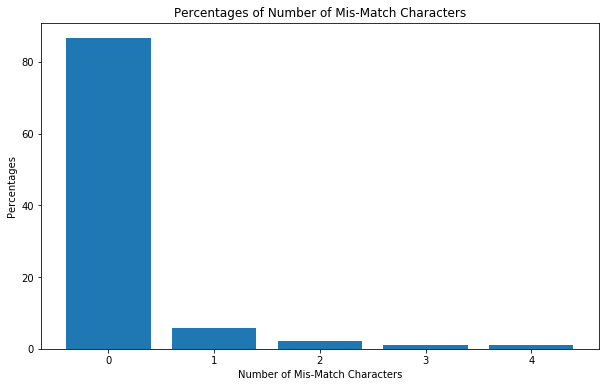

0  Mis-Match Characters Percentage:  86.58  %
1  Mis-Match Characters Percentage:  5.78  %
2  Mis-Match Characters Percentage:  2.15  %
3  Mis-Match Characters Percentage:  1.18  %
4  Mis-Match Characters Percentage:  1.07  %


In [80]:
mis_match_character_analysis_plot(mis_match_cnts_1,12000)

**Synth Text Test Data**

In [84]:
test_img_names=test_data['ImageName'].values
test_labels=test_data['Labels'].values

In [85]:
synth_test_accuracy,synth_test_letter_acc,synth_test_letter_cnt,synth_test_mis_match=test_data_output_Prediction(model,test_img_names,test_labels)

Processed  1000  Images
Processed  2000  Images
Processed  3000  Images
Processed  4000  Images
Processed  5000  Images
Processed  6000  Images
Processed  7000  Images
Processed  8000  Images
Processed  9000  Images
Processed  10000  Images
Processed  11000  Images
Processed  12000  Images
Processed  13000  Images
Processed  14000  Images
Processed  15000  Images
Time Taken for Processing:  0:21:50.478253


In [86]:
print("Model Output Accuracy: ",(synth_test_accuracy/len(test_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_test_letter_acc/synth_test_letter_cnt)*100, " %")

Model Output Accuracy:  87.08666666666667  %
Model Output Letter Accuracy:  94.48166697375254  %


In [87]:
model_1_test_mis_match_dict=Counter(synth_test_mis_match)

**Model 1 Test Data Prediction Analysis upto 4 Character Mis-Matches**

In [88]:
mis_match_cnts_2=[]
for i in range(5):
    mis_match_cnts_2.append(model_1_test_mis_match_dict[i])

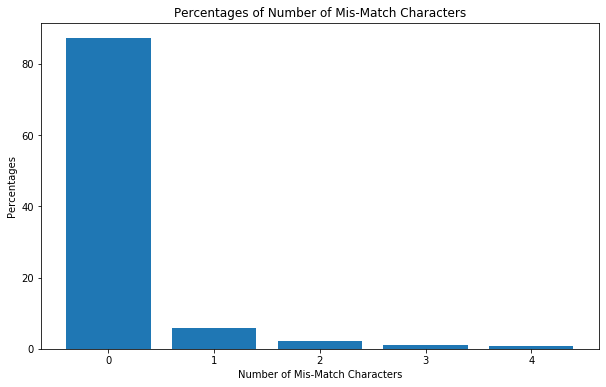

0  Mis-Match Characters Percentage:  87.19  %
1  Mis-Match Characters Percentage:  5.85  %
2  Mis-Match Characters Percentage:  2.1  %
3  Mis-Match Characters Percentage:  1.17  %
4  Mis-Match Characters Percentage:  0.91  %


In [89]:
mis_match_character_analysis_plot(mis_match_cnts_2,15000)